In [129]:
import h5py
import numpy as np
# Open a file to read
f = h5py.File('/home/jovyan/GNOME/hayward01_20210801_000009.hdf5', 'r')

In [307]:
f.id.id

72057594037927939

In [130]:
# list datasets objects
list(f)

['AuxiliaryMagneticFields',
 'CH2',
 'CH3',
 'Errors',
 'ExternalTemperatures',
 'InternalTemperatures',
 'MagneticFields',
 'SanityChannel']

In [306]:
# alternative instead of list()
# now the root group has eight dataset objects
# we can do a typical Python iteration
for x in f:
    print(x, f[x].id.id)

AuxiliaryMagneticFields 360287970189639704
CH2 360287970189639705
CH3 360287970189639706
Errors 360287970189639707
ExternalTemperatures 360287970189639708
InternalTemperatures 360287970189639709
MagneticFields 360287970189639710
SanityChannel 360287970189639711


In [308]:
# You can treat groups like Python dictionaries.
# Look up an item by providing the name
f["MagneticFields"].dtype

dtype('<f8')

In [311]:
# every object has a file property that will lead you back to the file
# it belongs to (in case you got lost)
magneticfields = f["MagneticFields"]
magneticfields.file

<HDF5 file "hayward01_20210801_000009.hdf5" (mode r)>

In [146]:
# Each object has an "attrs" property that is a dictionary of attributes
# attached to the objects
list(f.attrs)

['DataModel',
 'DefaultDataset',
 'DefaultMainEquation',
 'DefaultMainEquationVarName',
 'DefaultMainEquationVersion',
 'GNOMEAcquirer_version',
 'LocalFileCreationTime']

In [131]:
# set variables for each dataset in file
dataset0 = f["AuxiliaryMagneticFields"]
dataset1 = f["CH2"]
dataset2 = f["CH3"]
dataset3 = f["Errors"]
dataset4 = f["ExternalTemperatures"]
dataset5 = f["InternalTemperatures"]
dataset6 = f["MagneticFields"]
dataset7 = f["SanityChannel"]

In [154]:
# referencing an attribute returns the value, not the 
# attribute object
attr0 = f.attrs["DefaultDataset"]
attr0

'MagneticFields'

In [155]:
# referencing an attribute returns the value, not the 
# attribute object
attr1 = f.attrs["DefaultMainEquation"]
attr1

'MagFieldEq'

In [103]:
import pandas as pd
dataframe = pd.DataFrame(dataset[:])

In [47]:
# convert numpy result to Pandas dataframe
dataframe = pd.DataFrame(dataset[-12:])

In [160]:
list(dataset6.attrs)

['Altitude',
 'ChannelRange',
 'Date',
 'Latitude',
 'Longitude',
 'MagFieldEq',
 'MissingPoints',
 'SamplingRate(Hz)',
 'SensorDirAltitude(Deg)',
 'SensorDirAzimuth(Deg)',
 'SensorType',
 'Units',
 't0',
 't1']

In [167]:
sr_value = dataset6.attrs['SamplingRate(Hz)']
sr_value

512.0

In [170]:
t0_value = dataset6.attrs['t0']
t0_value 

'00:00:09.000000'

In [171]:
t1_value = dataset6.attrs['t1']
t1_value

'00:01:09.000000'

In [172]:
date_value = dataset6.attrs['Date']
date_value

'2021/08/01'

In [175]:
magfieldeq_value = dataset6.attrs['MagFieldEq']
magfieldeq_value

'120*MagneticFields[pT]'

In [176]:
dataset6.shape

(30720,)

In [185]:
%time data = dataset6[:]

CPU times: user 0 ns, sys: 2.3 ms, total: 2.3 ms
Wall time: 1.29 ms


In [186]:
# MagneticFields array values
data

array([-0.4361, -0.4144, -0.3921, ..., -0.4373, -0.4181, -0.397 ])

In [238]:
# new values = 120*MagneticFields
new_data = 120*data

In [239]:
new_data

array([-52.332, -49.728, -47.052, ..., -52.476, -50.172, -47.64 ])

In [241]:
len(new_data)

30720

In [232]:
start_index = 0
end_index = 1920   # set end_index to value between 1 an 7850
%time tseries = new_data[start_index:end_index]

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 20 µs


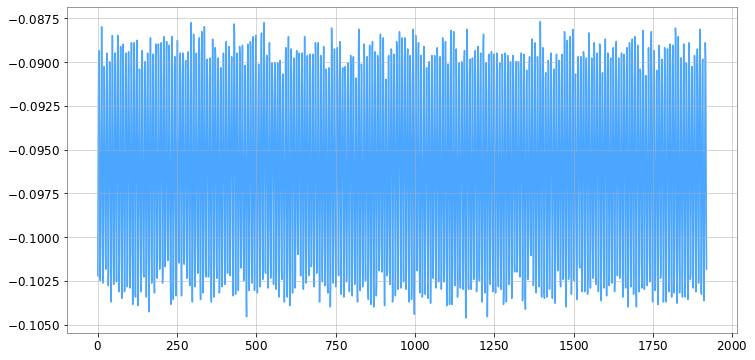

In [277]:
from gwpy.plot import Plot
plot = Plot(tseries, figsize=[12, 6],color='gwpy:ligo-livingston')
ax1 = plot.axes
plot.show()

In [278]:
from scipy.fftpack import fft, ifft

# Set fast fourier transform on hfilt
fft_tseries = fft(tseries)

In [279]:
print('Frequency Domain')
print(fft_tseries)
print('Notice The FFT returns a two-sided spectrum in complex form (real and imaginary parts).')

Frequency Domain
[-1.84584094e+02-0.j          6.17089762e-02-0.06987297j
 -2.89075472e-02+0.01261513j ... -6.01694111e-02+0.00253084j
 -2.89075472e-02-0.01261513j  6.17089762e-02+0.06987297j]
Notice The FFT returns a two-sided spectrum in complex form (real and imaginary parts).


In [280]:
len(fft_tseries)

1920

The amplitude of the FFT is related to the number of points in the time-domain signal


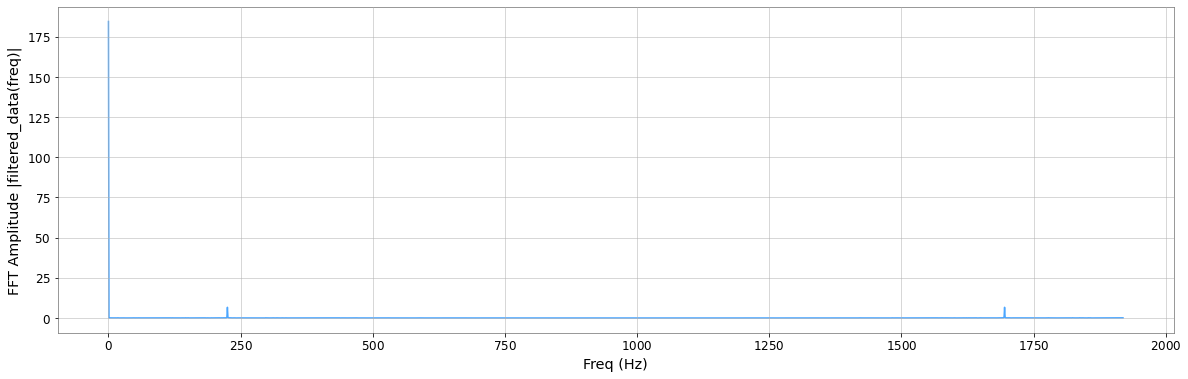

In [281]:
from gwpy.plot import Plot
import matplotlib.pyplot as plt

plot2 = Plot(np.abs(fft_tseries), figsize=[20, 6],
            color='gwpy:ligo-livingston')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |filtered_data(freq)|')
plot2.show()
print('The amplitude of the FFT is related to the number of points in the time-domain signal')